# Retention of clients of a network of fitness centers

The network of fitness centers "Bodybuilder-datascientist" develops a strategy for interacting with clients based on analytical data. A common problem for fitness clubs and other services is the outflow of customers. Churn indicators are industry specific. For a fitness center, we can consider that a client has been churned if he has never visited the gym in the last month. To combat churn, Bodybuilder Data Scientist's customer service department has digitized many client profiles. Our task is to analyze and prepare an action plan to retain customers.

**Work Plan**

- **Step 1. Open data files, study general information and prepare data**

    The path to the file:
    - /datasets/gym_churn.csv
    
    You need to make sure that the data type in each column is correct and that there are no missing values ​​or duplicates. Process them if necessary.
     
    
- **Step 2. Conduct Exploratory Data Analysis (EDA)**

    - Find out if there are missing features in the dataset, examine the means and standard deviations (using the `describe()` method);
    - Let's look at the average values ​​of features in two groups - those who churned and those who remained (using the `groupby()` method);
    - Let's build bar graphs and feature distributions for those who left (churn) and those who stayed (didn't get into churn);
    - Build a correlation matrix and display it.
    
    
- **Step 3. Building a churn forecasting model**

    Let's build a model of binary classification of customers, where the target feature is the fact that a customer churns in the next month:
    - Split the data into training and validation samples using the `train_test_split()` function;
    - Train the model on the train-sample in two ways:
      - logistic regression,
      - random forest;
    - Let's evaluate the accuracy, precision and recall metrics for both models on the validation set. Let's compare models. Let's find out which model performed better based on the metrics.
         
      
- **Step 4. Client clustering**
    
    Let's cluster objects (clients):
    - We standardize the data;
    - Let's build a distance matrix using the `linkage()` function on a standardized feature matrix and draw a dendrogram. Based on the resulting graph, we will make an assumption how many clusters can be identified;
    - Train a clustering model based on the K-Means algorithm and predict client clusters. We will agree to take `n=5` as the number of clusters so that the results can be compared with the results of other students;
    - Let's study the average values ​​of features for clusters. Let's draw conclusions;
    - Let's construct distributions of signs for clusters. Let's draw conclusions;
    - For each resulting cluster, we calculate the share of the outflow (using the `groupby()` method). Let's find out if they differ in the share of outflow and which clusters are prone to outflow, and which ones are reliable.


- **Step 5. Formulate conclusions and make basic recommendations for working with clients**


- **Description of data**

   File `/datasets/gym_churn.csv` (data for the month before the churn and the fact of the churn for a certain month):

    - Client data for the previous month before checking the outflow fact:
       - `gender` - gender
       - `Near_Location` - living or working in the area where the fitness center is located
       - `Partner` - an employee of the partner company of the club (cooperation with companies whose employees can receive discounts on a subscription - in this case, the fitness center stores information about the client's employer)
       - `Promo_friends` - the fact of the initial registration as part of the "bring a friend" promotion (used a promo code from a friend when paying for the first subscription)
       - `Phone` - the presence of a contact phone
       - `Age` - age
       - `Lifetime` - time since the first visit to the fitness center (in months)
       
    - Information based on the log of visits, purchases and information about the current status of the client's subscription:
       - `Contract_period` - duration of the current active subscription (month, 6 months, year)
       - `Month_to_end_contract` - term until the end of the current active subscription (in months)
       - `Group_visits` - the fact of visiting group classes
       - `Avg_class_frequency_total` - the average frequency of visits per week for the entire time since the beginning of the subscription
       - `Avg_class_frequency_current_month` - average frequency of visits per week for the previous month
       - `Avg_additional_charges_total` - total revenue from other services of the fitness center: cafe, sporting goods, cosmetic and massage salon
              
  - `Churn` - the fact of the outflow in the current month

## Loading data and preparing it for analysis
Let's load the data into a variable. Optimizing data for analysis. Make sure the data type in each column is correct. The path to the file:

 -   /datasets/gym_churn.csv.

### Data overview

Let's open the table and see general information about it.

In [1]:
# import required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# reading a data file and saving to a variable
pth1 = '/datasets/gym_churn.csv'
pth2 = 'C:/Users/tatar/downloads/gym_churn.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df = pd.read_csv(pth2)
else:
    print('Something is wrong')
    
# print the first 5 rows of the table
display(df.head())

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [3]:
# getting general information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Let's check if there are duplicate rows in the original dataframe.

In [4]:
# counting duplicate rows in a table
df.duplicated().sum()

0

**Conclusions**

* It is necessary to replace the names of the columns, bring them to lower case;
* There are no missing values;
* Data types are correct;
* There are no duplicate rows.

### Data preprocessing

Let's convert the column names to lower case.

In [5]:
df.rename(str.lower, axis='columns', inplace=True) # renaming columns
df.columns # check

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

**Conclusions**

Column names are reduced to lowercase, the need for additional data preprocessing, if necessary, will be identified in subsequent steps.

## Exploratory Data Analysis (EDA)

Let's find out if there are missing features in the dataset, study the average values and standard deviations.

In [6]:
# output of characteristic values of features and target variable
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


**Conclusions**

* The gender distribution is approximately the same;
* The majority of clients (85%) live or work near the fitness club;
* Approximately half of the clients are employees of partner organizations;
* About 30% of clients came under the program "Bring a friend";
* Known mobile numbers for about 90% of customers;
* Average duration of customer subscriptions - 4.6 months;
* About 40% of clients attend group classes;
* The average age of clients is 29;
* Average additional costs per client - 146;
* Average term until the end of the contract - 4.3 months;
* Average time since the first visit to the fitness center - 3.7 months;
* Average frequency of visits for all time - 1.87 times a week;
* The average frequency of visits for the last month is 1.76 times a week.


Let's look at the average values ​​of the features in two groups - those who left in the outflow and those who remained.

In [7]:
# displaying of mean values of features
df.groupby('churn').agg('mean').T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


**Conclusions**

Based on the differences in the characteristics of customers who fell into the outflow and those who remained, we can say the following
* The distribution by sex does not differ;
* Closer living or working customers are less likely to churn, which is quite logical;
* Employees of partner companies stop visiting the fitness club less often than other clients;
* Clients who came through the promotion "Bring a friend" are half as likely to churn;
* The presence of a client's mobile number does not differ in groups;
* The average duration of the contract is longer for the remaining users, for most of the clients in the outflow, the contract period is 1 month (rather, this indicates that more often customers conclude a contract for 1 month);
* The remaining users go to group classes more often (although it is possible that those who have not yet had time to start going to them got into the outflow);
* Groups have a difference in the average age of clients;
* There is a slight difference in revenue from other fitness center services;
* The remaining time before the expiration of the contract is logically longer for the remaining customers;
* Customers in churn have lower average number of visits per week over time;
* The number of visits in the previous month is two times lower for customers in the outflow.


Let's build bar graphs and feature distributions for those who left (churn) and those who stayed (didn't get into churn).

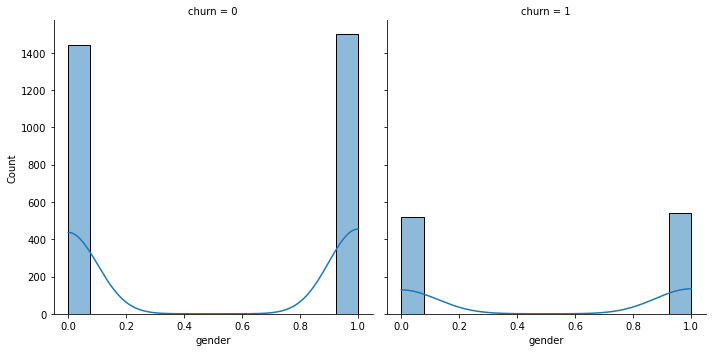

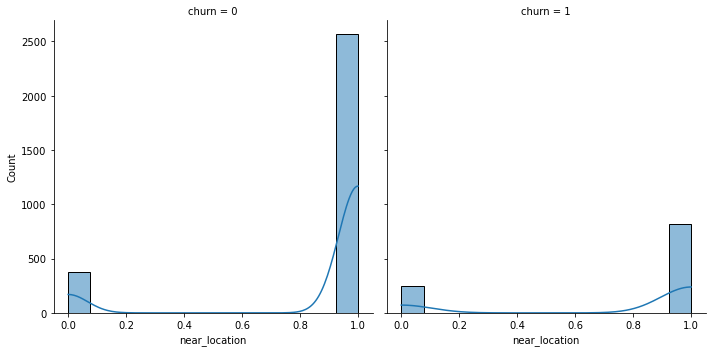

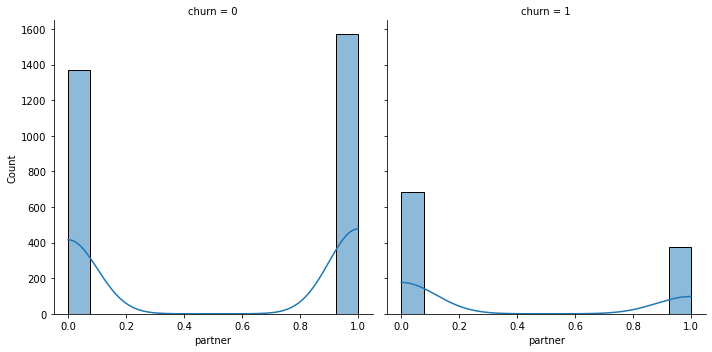

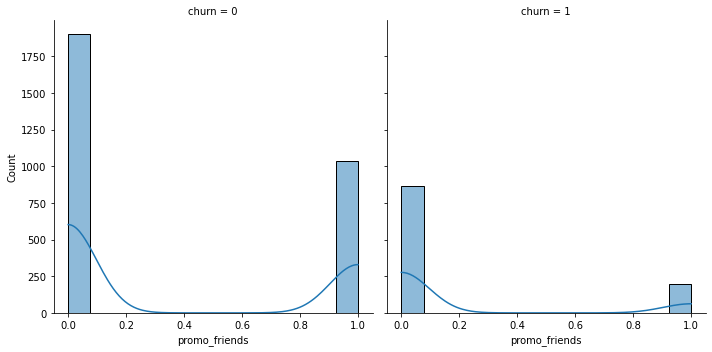

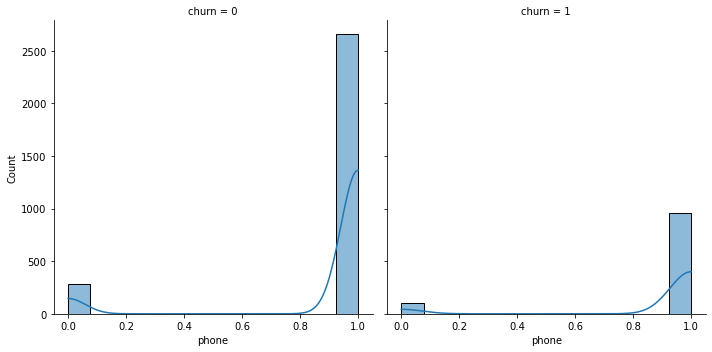

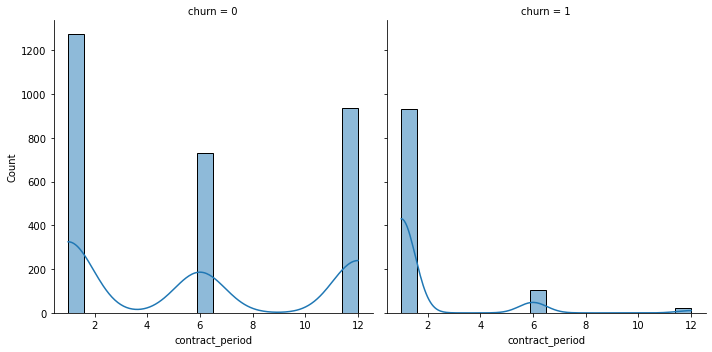

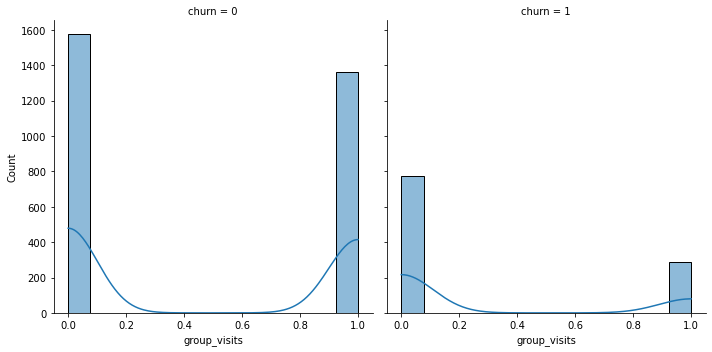

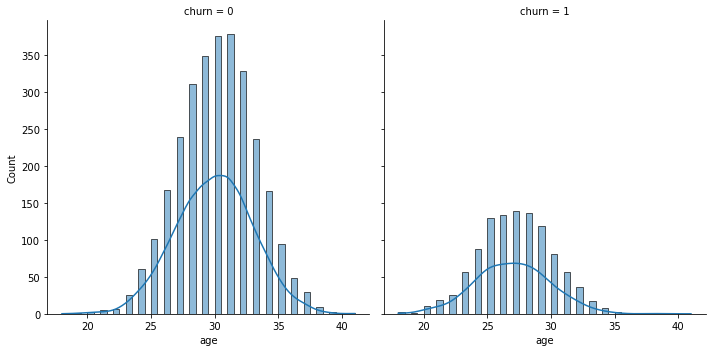

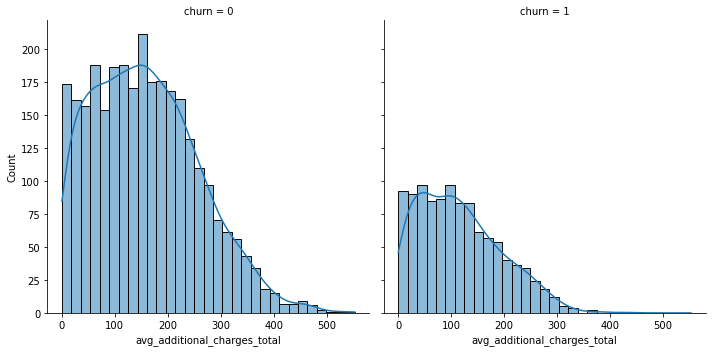

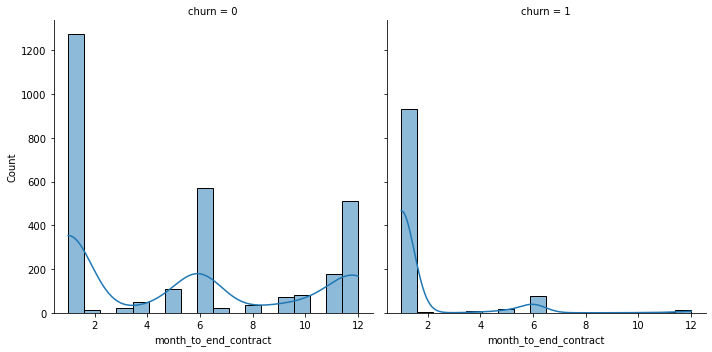

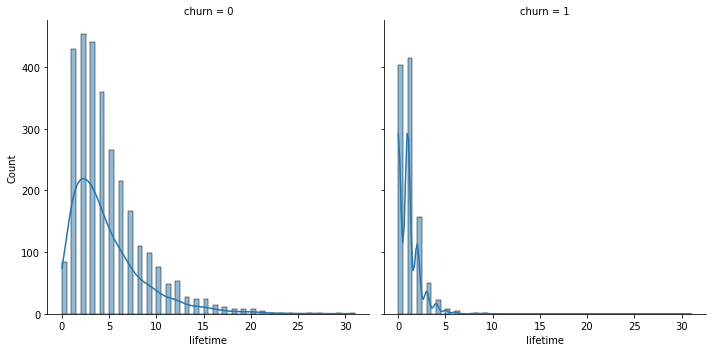

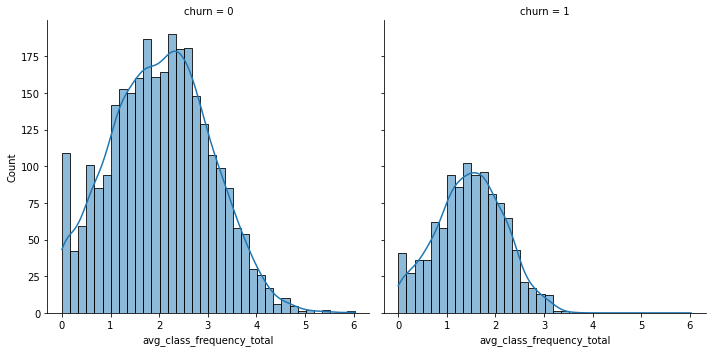

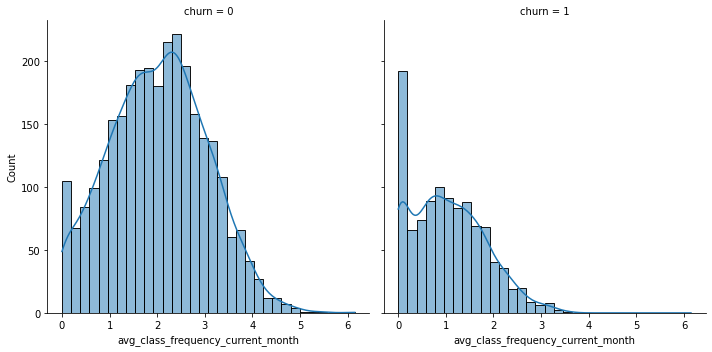

In [8]:
# construction of bar histograms and feature distributions
for column in df.drop('churn', axis = 1).columns:
    sns.displot(df, x=df[column], col='churn', kde = True)
    plt.show()

Let's build a correlation matrix and display it.

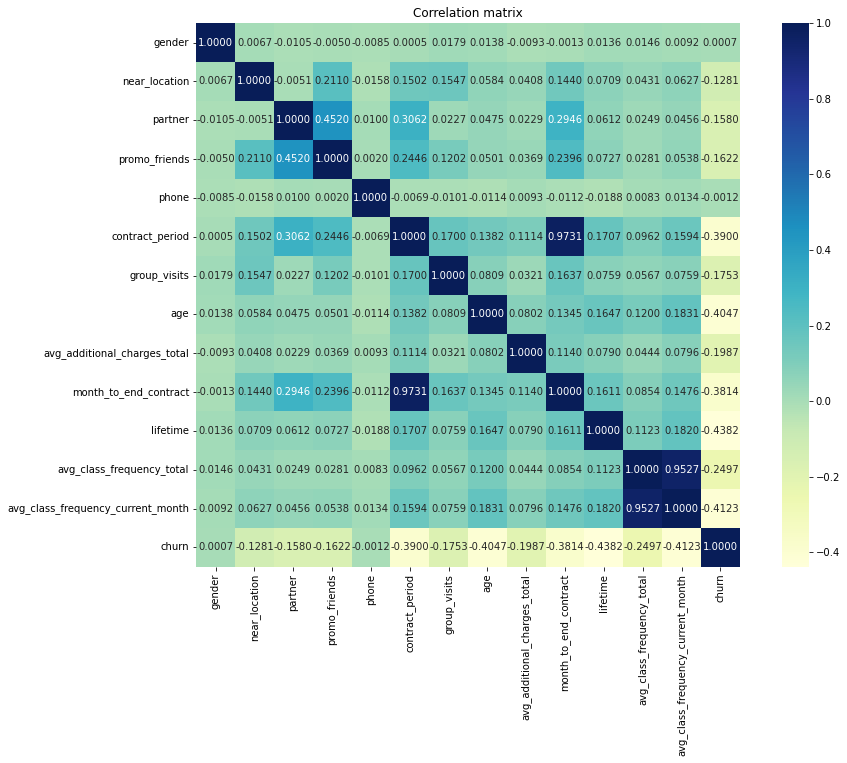

In [9]:
# correlation matrix
corr_m = df.corr()

# correlation matrix display
plt.figure(figsize=(15,10))
sns.heatmap(corr_m, annot=True, square = True, fmt='.4f', cmap='YlGnBu')
plt.title('Correlation matrix')
plt.show()

**Conclusions**

* Explicit dependence of the fact of the outflow on the signs was not found;
* There are two pairs of multicollinear features: `contract_period` - `month_to_end_contact` and `avg_class_frequency_total` - `avg_class_frequency_current_month`. The problem of multicollinearity is inherent only in regression models. We have a classification model in which, on the contrary, the more features, the better. Therefore, we will not remove multicollinear features.

## Building a churn forecasting model

Let's build a model of binary classification of customers, where the target feature is the fact that a customer churns in the next month:
    
    - Divide the data into training and validation samples;
    - Train the model on the train-sample in two ways:
       - logistic regression,
       - random forest;
    - Let's evaluate the accuracy, precision and recall metrics for both models on the validation set. Let's compare models. Let's find out which model performed better based on the metrics.

In [11]:
# separation of data into features (X) and target variable (y)
X = df.drop('churn', axis = 1) 
y = df['churn']

# splitting the model into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

Let's train the model on the train sample using the logistic regression method.

In [12]:
# setting the algorithm for the model
lr_model = LogisticRegression(solver='lbfgs', max_iter=1000)

# model training
lr_model.fit(X_train, y_train)

# formation of forecasts
lr_predictions = lr_model.predict(X_test)

Let's train the model on the train sample using the random forest method.

In [13]:
# setting the algorithm for the model
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)

# model training
rf_model.fit(X_train, y_train)

# formation of forecasts
rf_predictions = rf_model.predict(X_test)

Let's evaluate the accuracy, precision and recall metrics for both models on the validation set. Let's compare models.

In [14]:
# derivation of metrics
print('Metrics for a Logistic Regression Model:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, lr_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, lr_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, lr_predictions)))
print('\n')
print('Metrics for Random Forest Model:')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))

Metrics for a Logistic Regression Model:
Accuracy: 0.93
Precision: 0.89
Recall: 0.85


Metrics for Random Forest Model:
Accuracy: 0.92
Precision: 0.88
Recall: 0.83


**Conclusions**

* The proportion of accurate answers, the accuracy and completeness are higher for the logistic regression method;
* Thus, the logistic regression model performed better.

## User clustering

Let's carry out clustering of objects (clients). First, let's standardize the data and build the distance matrix using the `linkage()` function on the standardized feature matrix.

In [15]:
# creating a new dataframe, no churn column
df_st = df.drop('churn', axis=1)

# data standardization
sc = StandardScaler()
x_sc = sc.fit_transform(df_st)

# building a distance matrix
linked = linkage(x_sc, method = 'ward')

Let's build a dendrogram.

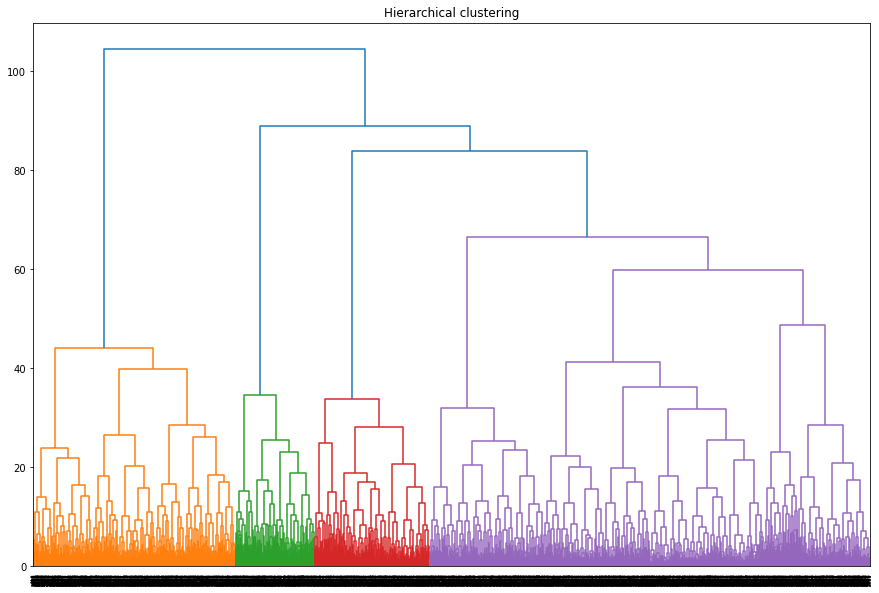

In [16]:
# building a dendrogram
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering')
plt.show()

The suggested optimal number of clusters is 4 - four different colors on the graph.

Next, our task will be:

    * Train a clustering model based on the K-Means algorithm and predict customer clusters;
    * Build feature distributions for clusters;
    * Look at the average values of features for clusters and calculate the share of outflow for each resulting cluster.

Let's train the clustering model:

In [17]:
# setting the k_means model with the number of clusters 5 (according to TOR)
km = KMeans(n_clusters = 5)

# cluster prediction for observations
labels = km.fit_predict(x_sc)

# saving cluster labels in the field of our dataset
df['cluster_churn'] = labels

# check
df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,cluster_churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,4
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,2
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,2


Let's look at the average values of features for clusters and calculate the share of outflow for each resulting cluster.

In [18]:
# displaying statistics on the average values of features by clusters
df.groupby(['cluster_churn']).mean().T

cluster_churn,0,1,2,3,4
gender,0.502478,0.557512,0.486378,0.496047,0.522078
near_location,0.959366,0.977700,1.000000,0.000000,0.862338
partner,0.783944,0.355634,0.350962,0.462451,0.470130
promo_friends,0.573835,0.235915,0.237179,0.079051,0.306494
phone,1.000000,0.998826,1.000000,1.000000,0.000000
contract_period,10.899901,2.640845,1.955128,2.359684,4.787013
group_visits,0.542121,0.470657,0.342147,0.217391,0.425974
age,29.975223,30.100939,28.168269,28.480237,29.301299
avg_additional_charges_total,160.820381,161.542456,131.244020,135.685249,143.957664
month_to_end_contract,9.960357,2.438967,1.862179,2.205534,4.475325


Let us construct feature distributions for clusters. For categorical features, we use the `sns.countplot()` method, for numerical features - `sns.kdeplot()`.

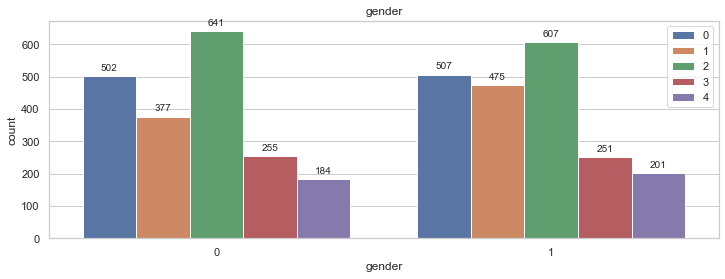

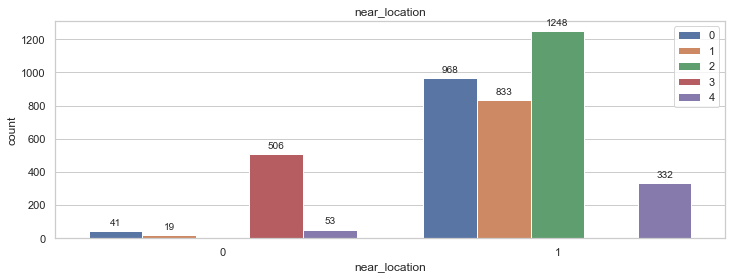

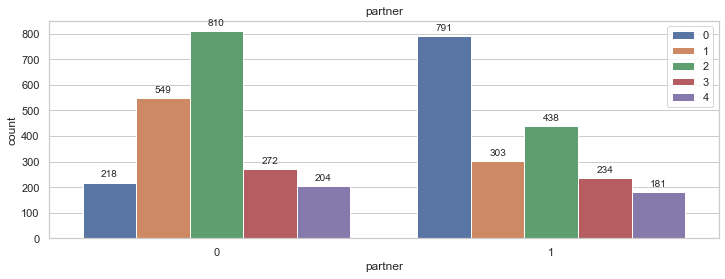

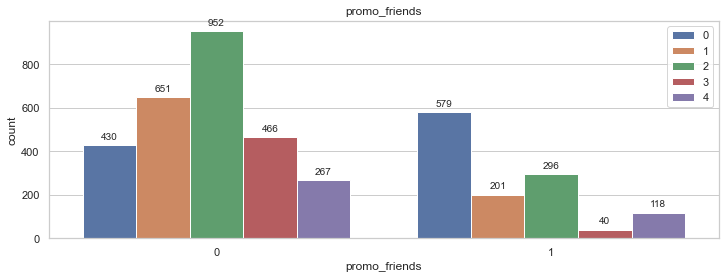

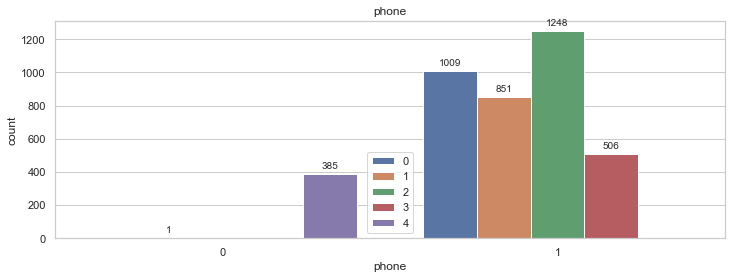

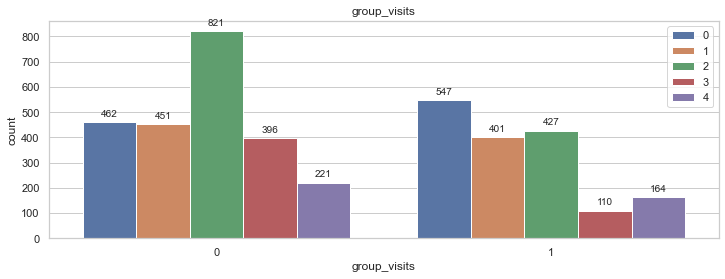

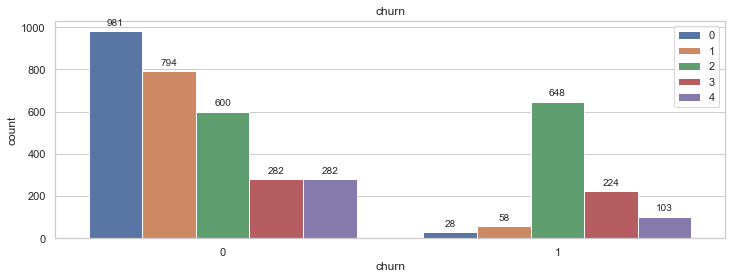

In [19]:
categorical_columns = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'churn']

for column in categorical_columns:
    plt.figure(figsize=(12, 4))
    sns.set_theme(style='whitegrid')
    plots = sns.countplot(x=df[column], hue='cluster_churn', data=df)
    # добавление аннотаций к графику
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.0f'),
                       (bar.get_x() + bar.get_width() / 2,
                       bar.get_height()), ha='center', va='center',
                       size=10, xytext=(0, 8),
                       textcoords='offset points')
    plt.title(column)
    plt.legend()
    plt.show()

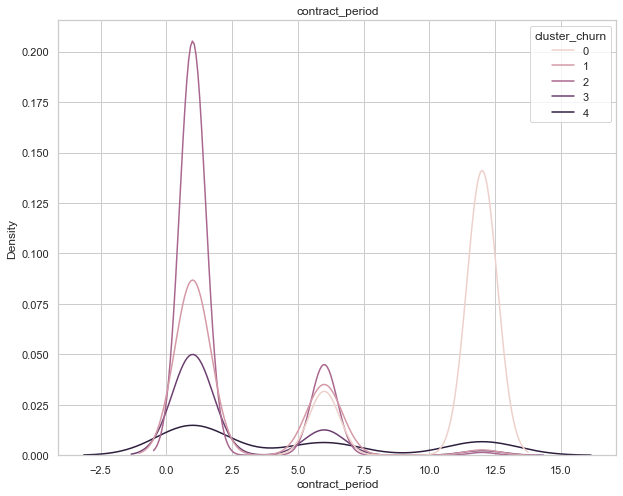

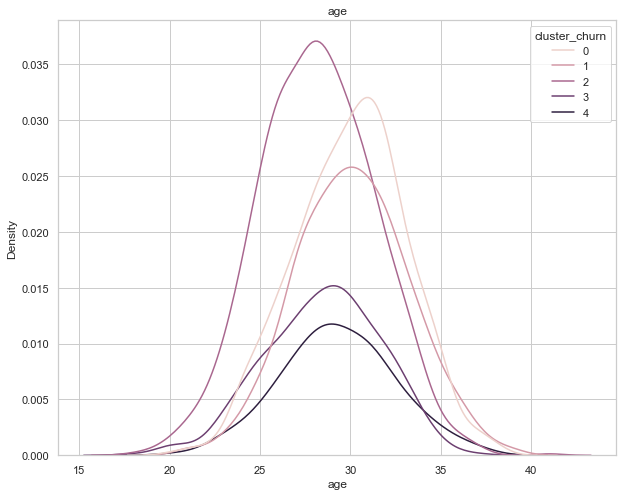

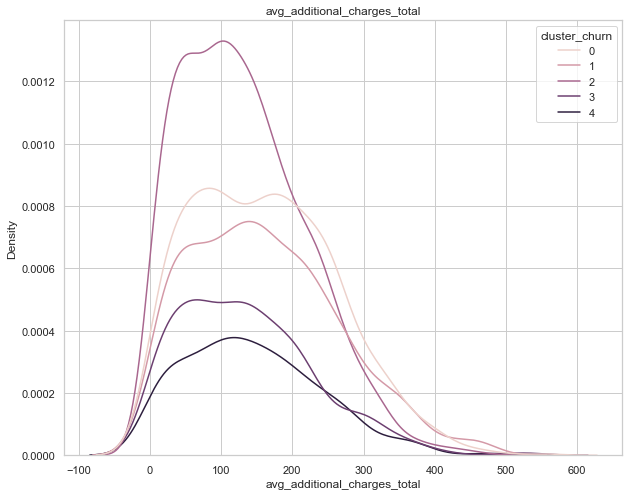

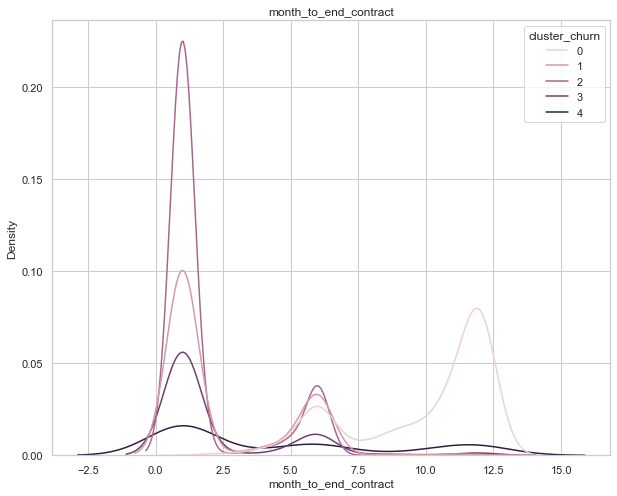

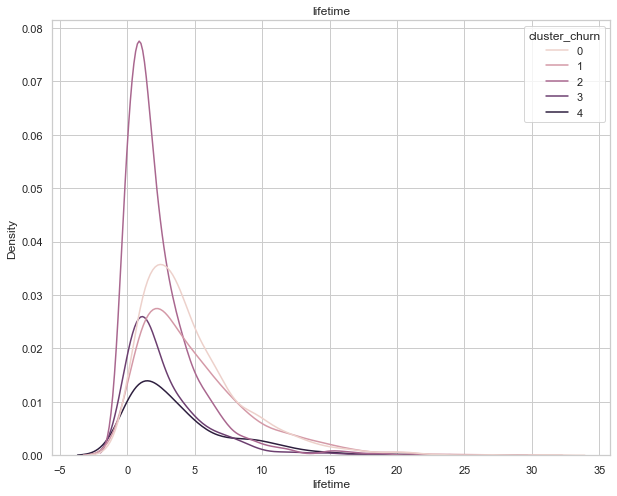

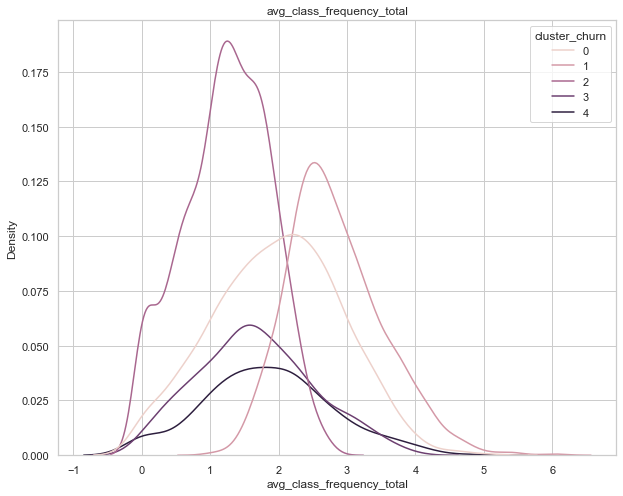

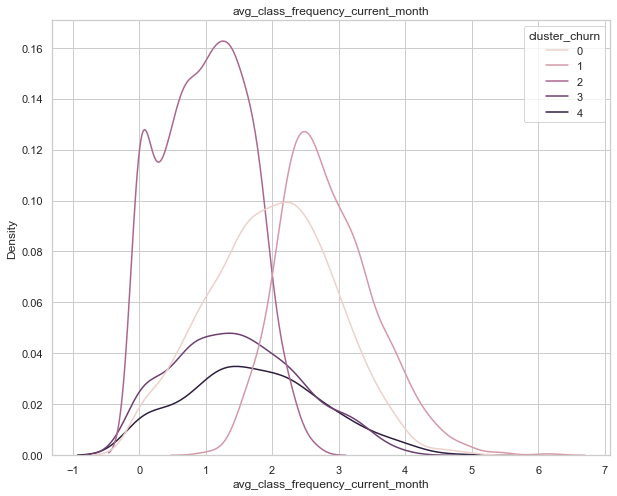

In [20]:
numerical_columns = ['contract_period', 'age', 'avg_additional_charges_total', 'month_to_end_contract',
                     'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']

for column in numerical_columns:
    plt.figure(figsize=(10, 8))
    sns.set_theme(style='whitegrid')
    sns.kdeplot(x=df[column], hue='cluster_churn', data=df)
    plt.title(column)
    plt.show()

Based on the results of the analysis of the average values of features and their distribution for clusters, we will form a description of the clusters.

**Cluster Description:**

* **Cluster 0**
    * Churn - 7%
    * Live or work near a fitness center
    * Mostly holders of short-term subscriptions for 1-3 months
    * **Most visits all time and last month**
    * Worst group in terms of the number of clients attracted by the promotion
* **Cluster 1**
    * Churn - 44%
    * **Live or work far from the fitness center**
    * Least likely to attend group classes
    * Contracts not for a long period - an average of 2.3 months
* **Cluster 2**
    * **Churn - 52% - the highest**
    * Live or work near a fitness center
    * Holders of the shortest-term season tickets - for 1.9 months
    * Least of all employees of partner companies - 35%
    * Worst of all visit the fitness club
* **Cluster 3**
    * Churn - 27%
    * Live or work near a fitness center
    * Average 4.5 month contracts
    * **No mobile number**
* **Cluster 4**
    * **Churn - 3% - the lowest**
    * Live or work near a fitness center
    * Employees of partner companies predominate - 78%
    * Sign contracts for a long period - 11 months
    * Most often attend group classes - 55%
    * Most of all came through promotions - 57%

## Conclusions and recommendations for working with clients

We have built a predictive model with good accuracy. Now we can predict the probability of churn for each client. Explicit dependences of the fact of outflow on one specific sign from those considered were not found.

**Conclusions based on available data:**

* The gender distribution is approximately the same;
* The majority of clients (85%) live or work near the fitness club;
* Approximately half of the clients are employees of partner organizations;
* About 30% of clients came under the program "Bring a friend";
* Known mobile numbers for about 90% of customers;
* Average duration of customer subscriptions - 4.6 months;
* About 40% of clients attend group classes;
* The average age of clients is 29;
* Average additional costs per client - 146;
* Average term until the end of the contract - 4.3 months;
* Average time since the first visit to the fitness center - 3.7 months;
* Average frequency of visits for all time - 1.87 times a week;
* Average frequency of visits for the last month - 1.76 times a week;
* Share of outflow - 27%.


**Conclusions based on differences in characteristics between customers who were churned and those who remained:**

* The distribution by sex does not differ;
* Closer living or working customers are less likely to churn, which is quite logical;
* Employees of partner companies stop visiting the fitness club less often than other clients;
* Clients who came through the promotion "Bring a friend" are half as likely to churn;
* The presence of a client's mobile number does not differ in groups;
* The average duration of the contract is longer for the remaining users, for most of the clients in the outflow, the contract period is 1 month (this indicates that more often customers conclude a contract for 1 month);
* The remaining users go to group classes more often (although it is possible that those who have not yet had time to start going to them got into the outflow);
* Groups have a difference in the average age of clients;
* There is a slight difference in revenue from other fitness center services;
* The remaining time before the expiration of the contract is logically longer for the remaining customers;
* Customers in churn have lower average number of visits per week over time;
* The number of visits in the previous month is two times lower for customers in the outflow.


**Recommendations for working with clients:**

Loyal customers bring in the most revenue. Based on the analysis carried out, it is recommended:

* Set up targeted advertising for customers located in the immediate vicinity of the fitness center. Such a group of clients is most likely to attend classes on a regular basis;
* Focus on a variety of group activities and various additional services;
* Organize special offers for subscriptions lasting from a year, as such customers stop walking less often;
* Conduct additional research on clients who have bought a subscription and have never visited a fitness club. Such a study will help to understand how to transfer at least some of these customers into the category of permanent ones.